<a href="https://colab.research.google.com/github/issarbhavya/machine_learning_projects/blob/main/spam_email_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset (adjust the file path accordingly)
data = pd.read_csv('emails.csv')

# Check the first few rows of the dataset to understand its structure
print(data.head())


  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...       0.0  0.0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...       0.0  0.0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...       0.0  0.0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...       0.0  0.0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...       0.0  0.0   

   valued  lay  infrastructure  military  allowing   ff  dry  Prediction  
0     0.0  0.0             0.0       0.0       0.0  0.0  0.0         0.0  
1     0.0  0.0             0.0       0.0       0.0  1.0  0.0         0.0  
2     0.0  0.0             0.0       0.0       0.0  0.0  0.0         0.0  
3     0.0  0.0             0.0       0.0       0.0  0.0  0.0         0.0  
4     0.0  0.0             0.0       0.0       0.0  1.0  0.0         0.0  

[5 rows x 3002 columns]


In [5]:
import pandas as pd

# Load the dataset (adjust the file path accordingly)
data = pd.read_csv('emails.csv')

# Define a threshold (you can adjust this threshold as needed)
threshold = 0.5

# Create a new 'label' column based on the 'Prediction' column or other criteria
data['label'] = data['Prediction'] > threshold

# Check the first few rows of the updated dataset
print(data.head())

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  jay  valued  lay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...  0.0     0.0  0.0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...  0.0     0.0  0.0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...  0.0     0.0  0.0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...  0.0     0.0  0.0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...  0.0     0.0  0.0   

   infrastructure  military  allowing   ff  dry  Prediction  label  
0             0.0       0.0       0.0  0.0  0.0         0.0  False  
1             0.0       0.0       0.0  1.0  0.0         0.0  False  
2             0.0       0.0       0.0  0.0  0.0         0.0  False  
3             0.0       0.0       0.0  0.0  0.0         0.0  False  
4             0.0       0.0       0.0  1.0  0.0         0.0  False  

[5 rows x 3003 columns]


In [3]:
print(data.columns)

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


In [4]:
if 'label' in data.columns:
    print("Label column found.")
else:
    print("Label column not found.")

Label column not found.


In [6]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target labels (y)
# Assuming that you've already created the 'label' column as shown in the previous step
X = data.drop(['Email No.', 'Prediction', 'label'], axis=1)  # Exclude unnecessary columns
y = data['label']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (3888, 3000) (3888,)
Testing data shape: (973, 3000) (973,)


In [8]:
# Drop rows with missing values from both training and testing sets


X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Match the labels to the remaining samples

X_test = X_test.dropna()
y_test = y_test[X_test.index]

Logistic Regression is a widely-used classification algorithm for binary classification tasks like spam email detection.
It models the probability that a given input belongs to a particular class (e.g., spam or non-spam).

In [9]:
#  logistic regression model:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train a logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logistic_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9732785200411099
Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.97      0.98       684
        True       0.94      0.98      0.96       289

    accuracy                           0.97       973
   macro avg       0.96      0.97      0.97       973
weighted avg       0.97      0.97      0.97       973



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


A confusion matrix is a fundamental tool in binary classification tasks like spam email detection.
It provides a detailed breakdown of the model's predictions and their correctness.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

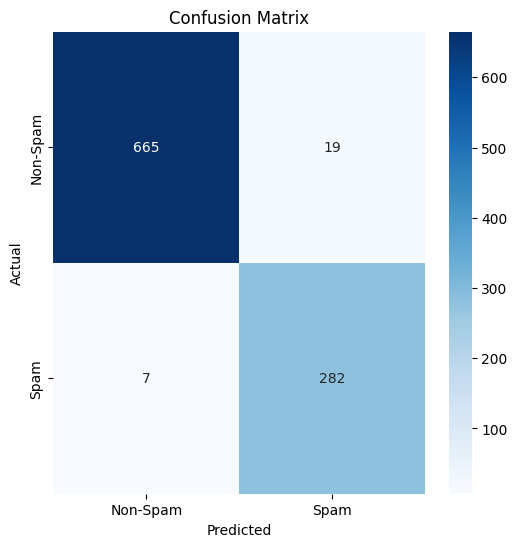

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

# Initialize and train a logistic regression classifier
baseline_classifier = LogisticRegression(random_state=42)
baseline_classifier.fit(X_train, y_train)

# Fit the classifier on the training data
baseline_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = baseline_classifier.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Recall measures the model's ability to correctly identify positive instances.
F1-score combines precision and recall to provide a balanced performance metric.


In [13]:
from sklearn.metrics import recall_score, f1_score

# Calculate Recall
recall = recall_score(y_test, y_pred)

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)

print("Recall:", recall)
print("F1-Score:", f1)


Recall: 0.9757785467128027
F1-Score: 0.9559322033898304


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize a logistic regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the logistic regression model on the training data
logistic_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logistic_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.9732785200411099
Precision: 0.9368770764119602
Recall: 0.9757785467128027
F1-Score: 0.9559322033898304


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Task: Spam Filtering with Logistic Regression
Understanding:


Now that you have trained the logistic regression model, you can apply it to classify new, unseen emails as either spam or non-spam.
The model assigns a probability score to each email, and you can set a threshold to determine the classification.

In [17]:
# Assuming you have a set of testing emails (X_test) and their true labels (y_test)
# Preprocess the test emails in the same way as your training data

# Use the trained logistic regression model to predict spam or non-spam
y_pred_test = logistic_classifier.predict(X_test)

# Calculate evaluation metrics for spam filtering
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print the evaluation metrics for spam filtering on the test emails
print("Accuracy for Spam Filtering:", accuracy_test)
print("Precision for Spam Filtering:", precision_test)
print("Recall for Spam Filtering:", recall_test)
print("F1-Score for Spam Filtering:", f1_test)


Accuracy for Spam Filtering: 0.9732785200411099
Precision for Spam Filtering: 0.9368770764119602
Recall for Spam Filtering: 0.9757785467128027
F1-Score for Spam Filtering: 0.9559322033898304


Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.


It is mainly used in text classification that includes a high-dimensional training dataset.


It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.


Some popular examples of Naïve Bayes Algorithm are spam filtration, Sentimental analysis, and classifying articles.

In [19]:
from sklearn.naive_bayes import MultinomialNB

#Initialize a Naive Bayes classifier (e.g., MultinomialNB) from scikit-learn.
naive_bayes_classifier = MultinomialNB()

# Train the Naive Bayes model on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_nb = naive_bayes_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Print the evaluation metrics for the Naive Bayes model
print("Accuracy for Naive Bayes:", accuracy_nb)
print("Precision for Naive Bayes:", precision_nb)
print("Recall for Naive Bayes:", recall_nb)
print("F1-Score for Naive Bayes:", f1_nb)


Accuracy for Naive Bayes: 0.9496402877697842
Precision for Naive Bayes: 0.8846153846153846
Recall for Naive Bayes: 0.9550173010380623
F1-Score for Naive Bayes: 0.9184692179700499


Naive Bayes is a specific type of Bayesian classifier that makes a strong independence assumption among features. It's called "naive" because it assumes that all features are conditionally independent given the class label, which is a simplifying assumption.


whereas,


A Bayesian classifier, in a broad sense, refers to any classifier that utilizes Bayesian probability theory to make predictions.

#Task: Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional representation.
It aims to retain the most important information while reducing the number of features.
PCA can be beneficial for simplifying complex datasets and improving the efficiency of machine learning models.

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize your data (mean=0, variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA (retain n_components principal components)
n_components = 50  # Adjust this value based on your dataset
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train your machine learning models on X_train_pca and evaluate on X_test_pca


In this code, we standardize the data using StandardScaler to ensure that each feature has a mean of 0 and a variance of 1. Then, we apply PCA to reduce the dimensionality to n_components (you can adjust this value based on your dataset).

# Task: Support Vector Machine (SVM)

SVM finds a hyper-plane that creates a boundary between the types of data

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can choose the kernel based on your data

# Train the SVM model on the PCA-transformed training data
svm_classifier.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed testing data
y_pred_svm = svm_classifier.predict(X_test_pca)

# Evaluate the performance of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Print the evaluation metrics for the SVM model
print("Accuracy for SVM:", accuracy_svm)
print("Precision for SVM:", precision_svm)
print("Recall for SVM:", recall_svm)
print("F1-Score for SVM:", f1_svm)


Accuracy for SVM: 0.9558067831449126
Precision for SVM: 0.912751677852349
Recall for SVM: 0.9411764705882353
F1-Score for SVM: 0.9267461669505962


Recall (Sensitivity or True Positive Rate):



Definition: Recall is the ratio of correctly predicted positive observations (True Positives) to the total actual positive observations (True Positives + False Negatives). It measures the model's ability to capture all positive instances.


F1 Score:


Definition: The F1 Score is the harmonic mean of precision and recall. It provides a balance between precision and recall, which can be useful when you want to consider both false positives and false negatives.

# Task: K-Nearest Neighbor (KNN) Classification

 simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure. It is mostly used to classifies a data point based on how its neighbours are classified.


Hyperparameter k: The choice of the value of k is a crucial decision in KNN. A small k can make the model sensitive to noise, while a large k can make it overly smooth.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize a KNN classifier with the desired number of neighbors (k)
k = 5  # Adjust the value of k based on your dataset
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model on the PCA-transformed training data
knn_classifier.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed testing data
y_pred_knn = knn_classifier.predict(X_test_pca)

# Evaluate the performance of the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print the evaluation metrics for the KNN model
print("Accuracy for KNN:", accuracy_knn)
print("Precision for KNN:", precision_knn)
print("Recall for KNN:", recall_knn)
print("F1-Score for KNN:", f1_knn)


Accuracy for KNN: 0.9403905447070915
Precision for KNN: 0.8553846153846154
Recall for KNN: 0.9619377162629758
F1-Score for KNN: 0.9055374592833877


# Task: K-Means Clustering
* Understanding:
K-Means is an unsupervised machine learning algorithm used for clustering data points into groups or clusters.
It assigns each data point to the cluster whose centroid (center) is nearest to it.


* easy-language:
K-Means clustering helps you find natural groupings in your data, just like sorting your marbles by color.

In [33]:
# Remove rows with missing data and save the modified data in data_nan_removed
data_nan_removed = data.dropna()

# Verify the shape of the new dataset to ensure rows with missing values are removed
print("Original data shape:", data.shape)
print("Data shape after removing rows with missing values:", data_nan_removed.shape)


Original data shape: (4861, 3003)
Data shape after removing rows with missing values: (4860, 3003)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


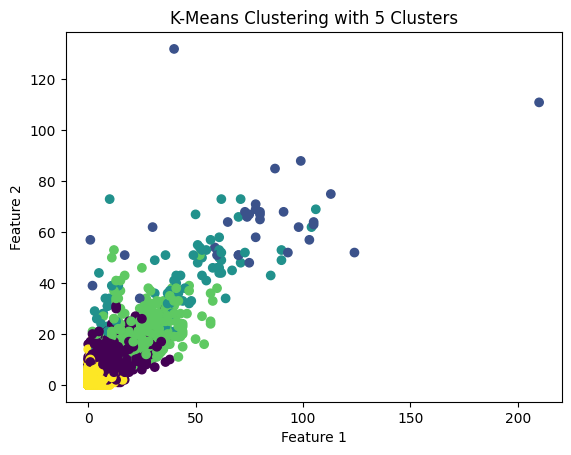

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have already preprocessed your cleaned dataset and stored it in X_cleaned
X_cleaned = data_nan_removed.drop(columns=['Email No.'])  # Adjust feature selection as needed

# You need to choose the number of clusters (k) based on your problem
k = 5  # Adjust the value of k based on your dataset

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_cleaned)

# Visualize the clusters (if your data is 2D or can be reduced to 2D)
# This is just a basic example; you might need more advanced visualization for high-dimensional data
plt.scatter(X_cleaned.iloc[:, 0], X_cleaned.iloc[:, 1], c=clusters)
plt.title(f'K-Means Clustering with {k} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Analyze the clusters and how emails are grouped together
# You can examine the cluster assignments to see which emails belong to each cluster


# Task: Choosing the Number of Clusters
Objective:


Methods for Choosing k:
* Elbow Method: As mentioned earlier, the Elbow Method involves running K-Means clustering for a range of k values and plotting the within-cluster sum of squares (WCSS) for each k. The "elbow point" on the plot is often considered as a good choice for k.

* Silhouette Score: Calculate the Silhouette Score for different k values and choose the one that gives the highest score. A higher silhouette score suggests better clustering.

* Gap Statistics: Gap statistics compare the performance of your clustering to a reference distribution. It helps you determine if your clustering is better than random. A larger gap indicates better clustering.

* Dendrogram: If you have hierarchical clustering available, you can use a dendrogram to visually inspect how data points are grouped at different levels of granularity. This can provide insights into the appropriate number of clusters.

* Domain Knowledge: If you have prior knowledge about the data or a specific business objective, it may guide your choice of k.

* Task-specific Objectives: The choice of k can also be influenced by the specific goals of your project. For example, if you're segmenting customers for targeted marketing, you might choose a k that aligns with your marketing strategies.

* Experimentation: Sometimes, you may need to experiment with different values of k to see which one produces the most meaningful and interpretable results for your problem.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

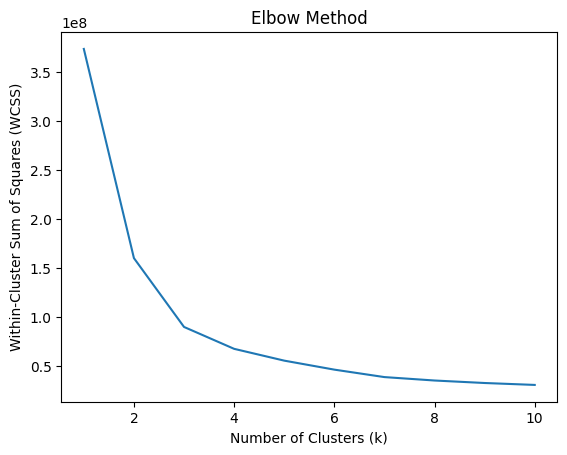

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_cleaned is your preprocessed and cleaned data
wcss = []  # Within-cluster sum of squares

# Try a range of k values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cleaned)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


# Task: Clustering Datapoints and Features


Group similar emails together and understand what makes each group unique.

Explanation:

* Grouping Emails: Imagine you have a pile of emails, and you want to organize them into different groups based on their content. For example, you might want to put all the emails about "vacation" in one group and those about "work" in another.

* Features(Understanding Each Group): Once you've grouped the emails, you want to figure out why certain emails ended up in the same group. Are they similar because they talk about the same topic or use similar words? Understanding this helps you make sense of the groups.

* Looking at Key Words: You also want to see which words or phrases are important in each group. For instance, in the "vacation" group, you might find words like "beach," "hotel," and "relax." These words tell you what the group is about.

* Visualizing the Results: It's helpful to create

*   List item
*   List item

visual summaries, like word clouds, that show the most common words in each group. This way, you can quickly see what stands out in each set of emails.

In a nutshell, this task is about organizing emails into groups, figuring out what defines each group, and visually summarizing the main themes or words in those groups. It helps you make sense of a large collection of emails.



---



---



---
# Task: Decision Tree Representation and construction

Prepare the Data: Make sure your dataset is ready for classification. This includes selecting the features (attributes) you want to use as inputs and the target variable (in this case, whether an email is spam or not).

Split the Data: Divide your dataset into a training set and a testing set. The training set is used to train the decision tree, while the testing set is used to evaluate its performance.

Create and Train the Decision Tree: Use the scikit-learn library to create a decision tree classifier. You can specify various parameters, such as the maximum depth of the tree or the criteria for splitting nodes (e.g., Gini impurity or entropy). Train the decision tree on the training data.

Visualize the Decision Tree: After training, you can visualize the decision tree to understand how it makes decisions. Visualization helps you see which features are important for classification and how the tree branches based on those features.

Evaluate the Model: Use the testing data to evaluate the decision tree's performance. You can calculate metrics like accuracy, precision, recall, and F1-score to assess how well the model classifies spam and non-spam emails.

Interpret the Tree: Analyze the decision tree to interpret its rules


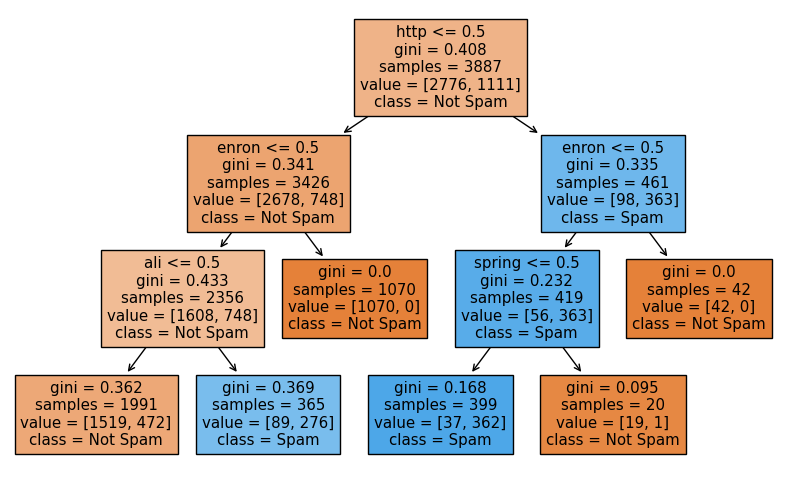

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming you have a preprocessed dataset with features X_train and labels y_train
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)  # You can adjust the max_depth parameter

# Train the classifier
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X_train.columns, class_names=['Not Spam', 'Spam'], filled=True)
plt.show()

# Evaluate the model using test data and metrics (accuracy, precision, recall, F1-score)


# Task: Basic Decision Tree Learning Algorithm
Objective:
Understand the basic principles of how decision trees make classification decisions.

Learn about the splitting criteria and node selection process in decision trees.

Key Concepts:

* Node: In a decision tree, a node represents a question or condition about a feature. For example, a node might ask, "Is the word 'money' in the email?"

* Splitting Criteria: The decision tree algorithm selects the best feature and a threshold (for numeric features) to split the data into subsets at each node. The goal is to create subsets that are as pure as possible, meaning that they contain mostly one class (e.g., spam or non-spam).

* Entropy and Information Gain: Decision trees commonly use metrics like entropy and information gain to measure the impurity or disorder of subsets. Entropy represents the level of disorder in a set of data points. Information gain quantifies how much the knowledge of a feature's value reduces uncertainty about the class labels.

* Gini Impurity: Another metric used for splitting criteria is Gini impurity, which measures the probability of misclassifying a randomly chosen element in the dataset. Lower Gini impurity indicates purer subsets.

* Node Selection: The decision tree algorithm selects the feature and threshold that result in the greatest reduction in impurity (e.g., highest information gain or lowest Gini impurity) when creating child nodes. This process is repeated recursively for each subset until a stopping criterion is met.



---

# Key Issues in Decision Trees:

* Overfitting: Decision trees can become overly complex and fit the training data too closely, capturing noise in the data. This leads to poor generalization to new, unseen data.

* Instability: Small changes in the training data can lead to significantly different tree structures. Decision trees can be sensitive to data variations.

* Categorical Variables: Decision trees typically work well with numeric features, but handling categorical variables directly can be challenging. Strategies like one-hot encoding or label encoding may be needed.

* Bias Towards Dominant Classes: Decision trees tend to favor features that have a larger number of levels or values, potentially causing bias towards dominant classes.

* Limited Expressiveness: Decision trees may not capture complex relationships in the data, especially when dealing with high-dimensional datasets.